In [13]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input400sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.99609375
1.0
1.0
1.0
1.0
0.99609375
1.0
1.0
1.0
0.984375


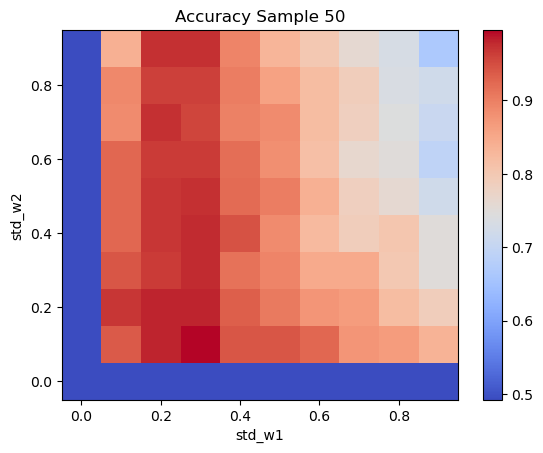

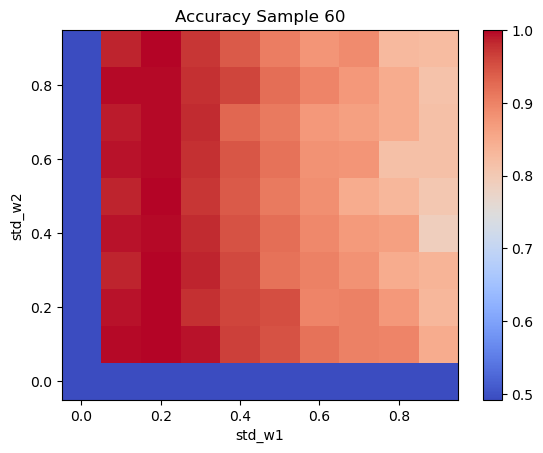

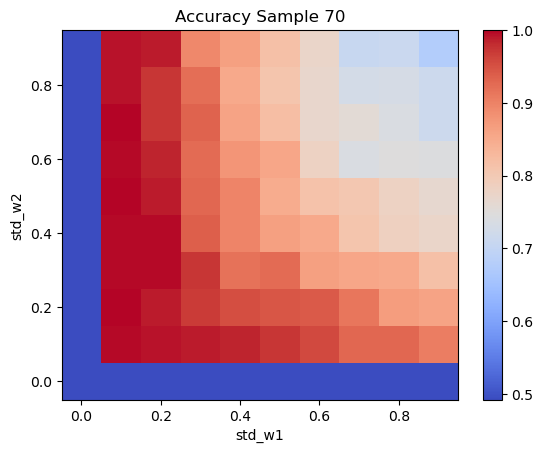

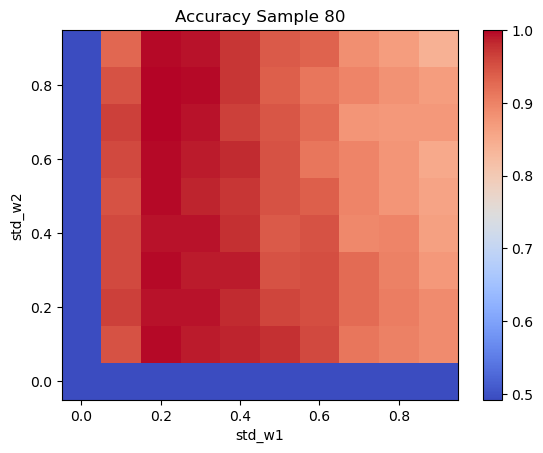

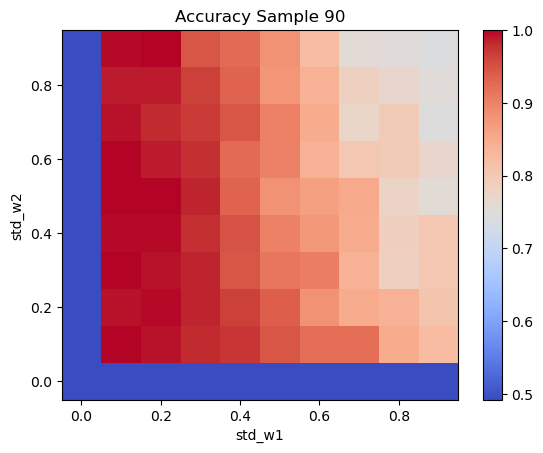

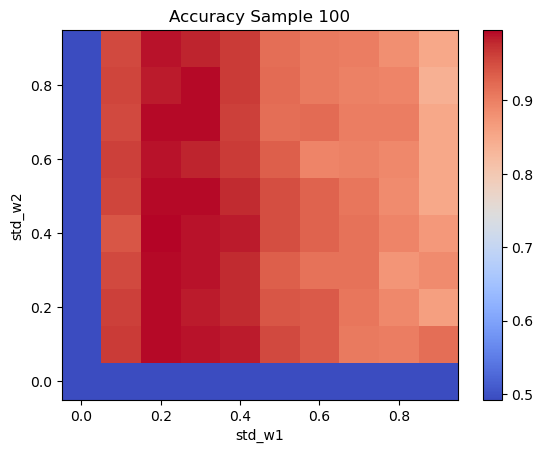

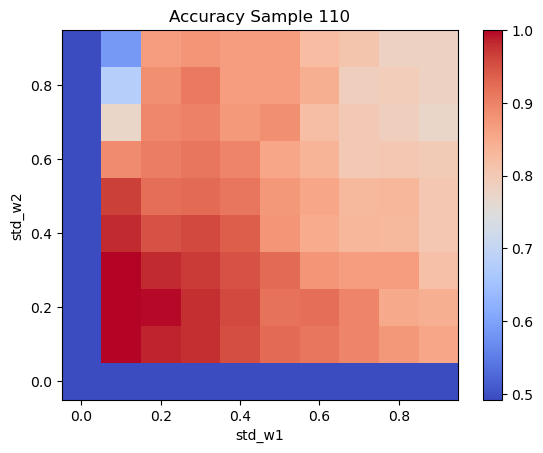

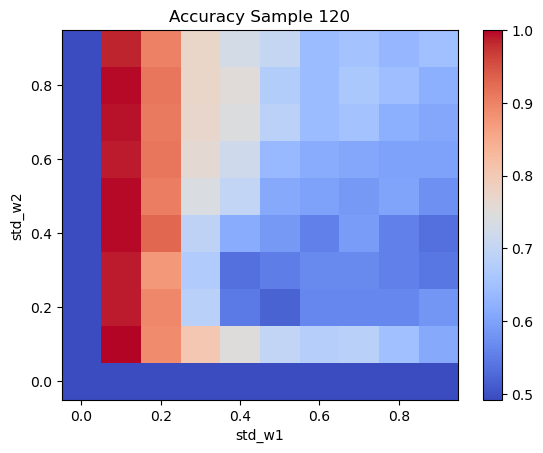

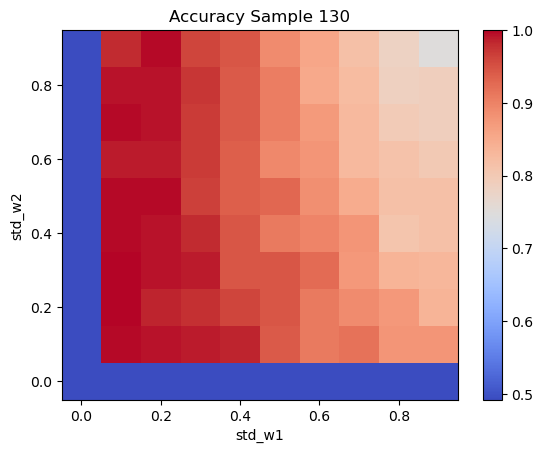

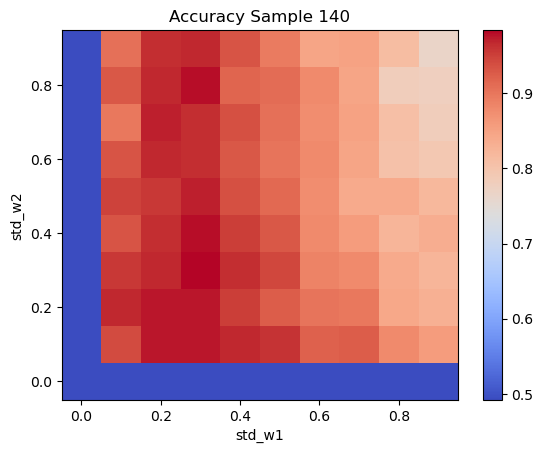

In [14]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T, cmap ='coolwarm')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [15]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [16]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.978125  , 0.98359375, 0.97773438, 0.97148437,
        0.97226563, 0.96328125, 0.94453125, 0.93710938, 0.91523438],
       [0.4921875 , 0.9796875 , 0.98007813, 0.97578125, 0.978125  ,
        0.97265625, 0.96953125, 0.96835938, 0.96640625, 0.96757812],
       [0.4921875 , 0.96796875, 0.95      , 0.95078125, 0.94609375,
        0.94375   , 0.9421875 , 0.94296875, 0.94492188, 0.93398437],
       [0.4921875 , 0.94882813, 0.91875   , 0.909375  , 0.91523438,
        0.91328125, 0.90976563, 0.90507812, 0.90664062, 0.90351563],
       [0.4921875 , 0.9265625 , 0.8953125 , 0.89023438, 0.87695312,
        0.87695312, 0.87304688, 0.87695312, 0.86875   , 0.86523438],
       [0.4921875 , 0.90429688, 0.87851563, 0.86445313, 0.85039062,
        0.8484375 , 0.83359375, 0.83671875, 0.83632812, 0.82851562],
       [0.4921875 , 0.8875    , 0.8617187

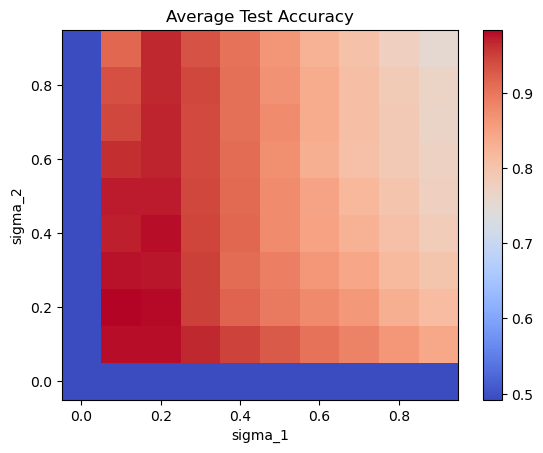

In [17]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_accuracy_grid_400_0.1.png".format(sample))

In [18]:
average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [19]:
test1 = average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_accuracy_grid_10_by_10_10_samples>0.97148436)

print(test2)


[0.93710938 0.9421875  0.94296875 0.94375    0.94453125 0.94492188
 0.94609375 0.94882813 0.95       0.95078125 0.96328125 0.96640625
 0.96757812 0.96796875 0.96835938 0.96953125 0.97148437 0.97226563
 0.97265625 0.97578125 0.97773438 0.978125   0.978125   0.9796875
 0.98007813 0.98359375]


In [20]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.1
    array.append(tbw1_w2)

In [21]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 400
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("accuracy_400_seed_{}.npz".format(i),**data)
    i+=1

In [22]:
data = {}
data['frequency'] = 65
data['N'] = 400
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("accuracy_400",**data)